In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
α = .05
alpha= .05


import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [24]:
df = pd.read_csv('banking.csv')
df.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [64]:
df.pdays.unique()

array([999,   3,   6,  10,   8,   4,   9,  11,   7,  12,   5,   2,  22,
        25,  15,  17,   0,  14,  13,   1,  16,  18,  19,  21,  20,  27,
        26])

In [67]:
def prepare_banking(df):
    #Drop amy nulls 
    df= df.dropna()
    #drop columns that i wasnt going to fully uses 
    df=df.drop(columns=['default','month','day_of_week','campaign','poutcome'])
    df = df.rename(columns={'age':'Age','job':'Job','marital':'Marital','education':'Education','housing':'Housing',
                            'loan':'Loan','contact':'Contact','duration':'Duration','pdays':'Pdays'})
    return df

In [68]:
prepare_banking(df)

Age           Job   Marital            Education Housing Loan  \
0       49   blue-collar   married             basic.9y      no   no   
1       37  entrepreneur   married    university.degree      no   no   
2       78       retired   married             basic.4y      no   no   
3       36        admin.   married    university.degree     yes   no   
4       59       retired  divorced    university.degree      no   no   
...    ...           ...       ...                  ...     ...  ...   
32945   28      services    single          high.school     yes   no   
32946   52    technician   married  professional.course     yes   no   
32947   54        admin.   married             basic.9y      no  yes   
32948   29        admin.   married    university.degree      no   no   
32949   35        admin.   married    university.degree      no  yes   

         Contact  Duration  Pdays  previous    y  
0       cellular       227    999         0   no  
1      telephone       202    999         1   no  
2       cellular      1148    999         0  yes  
3      telephone       120    999         0   no  
4       cellular       368    999         0   no  
...          ...       ...    ...       ...  ...  
32945   cellular       192    999         0   no  
32946   cellular        64    999         1   no  
32947   cellular       131    999         0   no  
32948  telephone       165    999         0   no  
32949  telephone       544    999         0   no  

[32950 rows x 11 columns]

# made a function for this 

In [3]:
def acquire_banking():
    df = pd.read_csv('banking.csv')
    return df

In [4]:
acquire_banking()

age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes   

         contact month day_of_week  duration  campaign  pdays  previous  \
0       cellular   nov         wed       227         4    999         0   
1      telephone   nov         wed       202         2    999         1   
2       cellular   jul         mon      1148         1    999         0   
3      telephone   may         mon       120         2    999         0   
4       cellular   jun         tue       368         2    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
32945   cellular   jul         tue       192         1    999         0   
32946   cellular   nov         fri        64         1    999         1   
32947   cellular   jul         mon       131         4    999         0   
32948  telephone   may         fri       165         1    999         0   
32949  telephone   jun         tue       544         3    999         0   

          poutcome    y  
0      nonexistent   no  
1          failure   no  
2      nonexistent  yes  
3      nonexistent   no  
4      nonexistent   no  
...            ...  ...  
32945  nonexistent   no  
32946      failure   no  
32947  nonexistent   no  
32948  nonexistent   no  
32949  nonexistent   no  

[32950 rows x 16 columns]

# checking for nulls and wondering if i should drop any columns 

In [5]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [7]:
df.age= df.age.astype(float)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [72]:
df.y =df.y.str.replace('yes', '1').str.replace('no', '0').astype('int')

In [9]:
def my_train_test_split(df, target):
    '''
    Takes in a dataframe and target (as a string). Returns train, validate, and test subset 
    dataframes with the .2/.8 and .25/.75 splits to create a final .2/.2/.6 split between datasets
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size = .25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [10]:
#spliting the data to 60%,20%,20%
train , validate, test=my_train_test_split(df,["y"])
print(f'Train=',train.shape) 
print(f'Validate=',validate.shape) 
print(f'Test=',test.shape) 

Train= (19770, 16)
Validate= (6590, 16)
Test= (6590, 16)


# Exploration: 

Percentage:
 married     60.682853
single      28.229641
divorced    10.900354
unknown      0.187152
Name: marital, dtype: float64


<Figure size 1296x576 with 0 Axes>

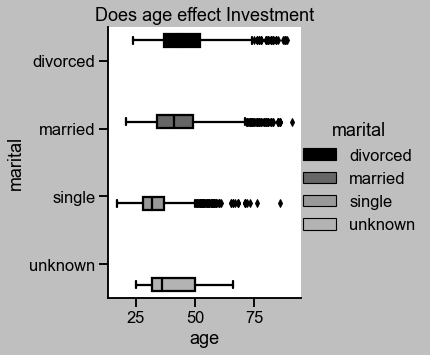

In [205]:
plt.figure(figsize=(18,8))
sns.catplot(data=train,x='age',y='marital',hue='marital',kind='box')
print("Percentage:\n",train["marital"].value_counts()/len(train)*100)
plt.title("Does age effect Investment")
plt.show()

Percentage:
 married     60.682853
single      28.229641
divorced    10.900354
unknown      0.187152
Name: marital, dtype: float64


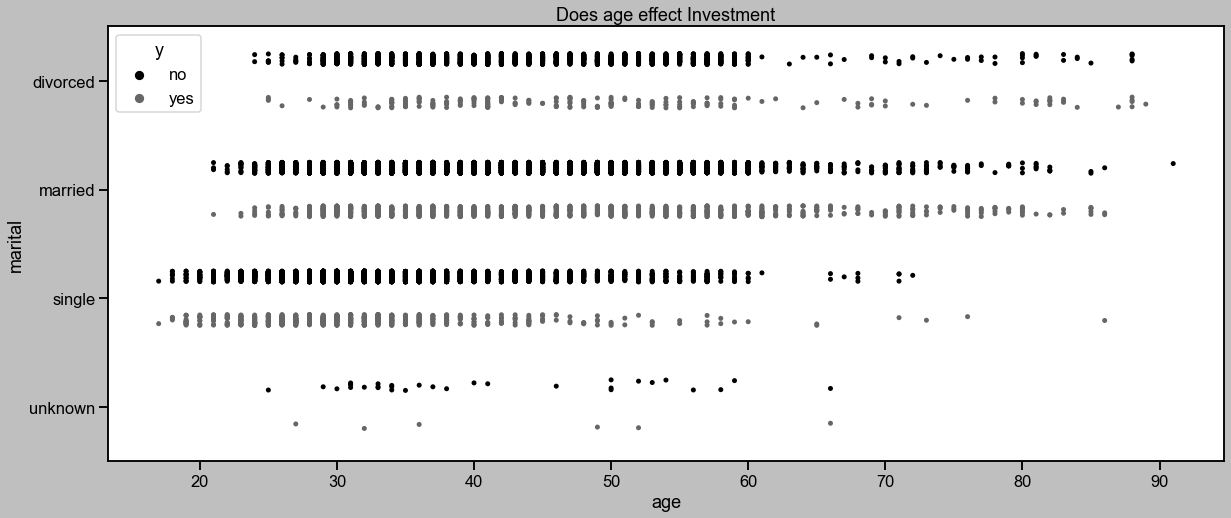

In [214]:
plt.figure(figsize=(20,8))
sns.stripplot(data=train,x='age',y='marital',hue='y',jitter = True,dodge = True)
print("Percentage:\n",train["marital"].value_counts()/len(train)*100)
plt.title("Does age effect Investment")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

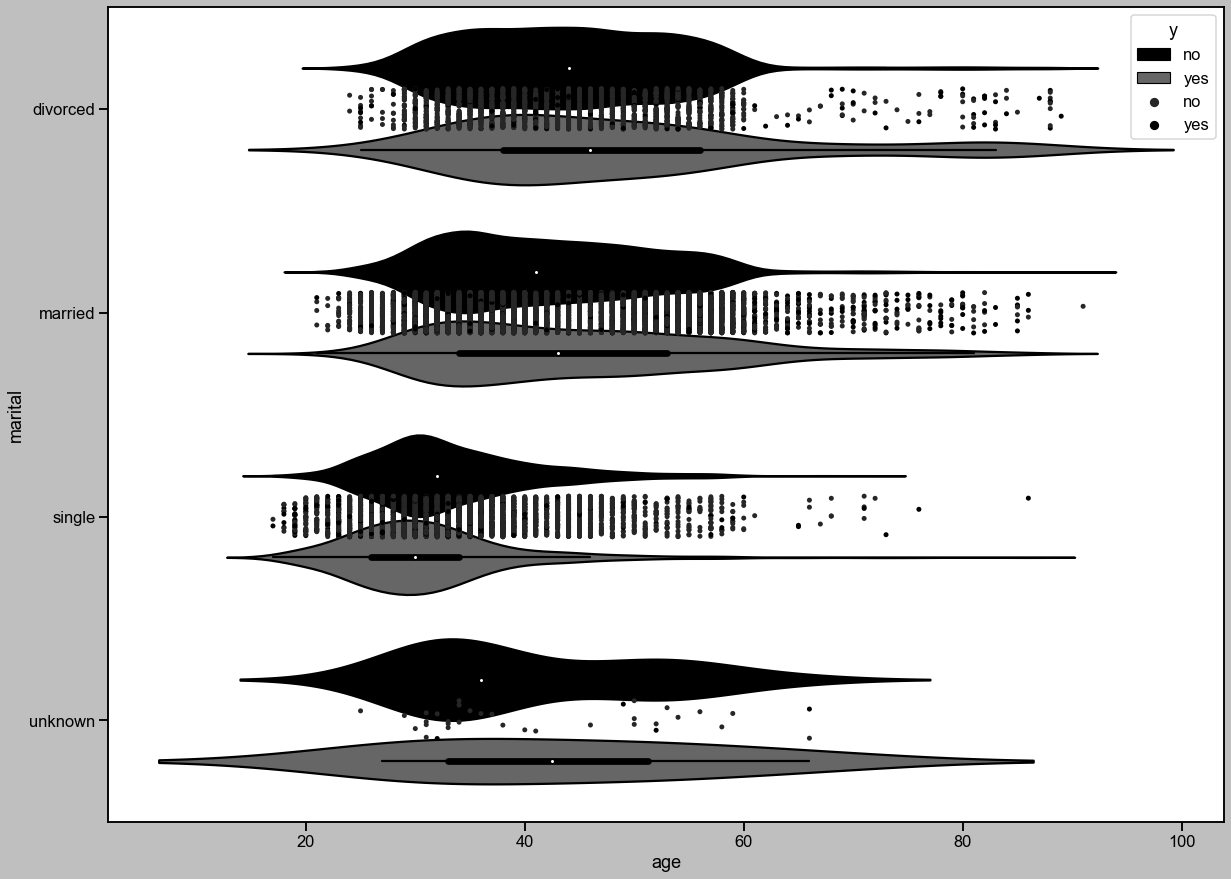

In [222]:
plt.figure(figsize=(20,15))
sns.violinplot(x ='age', y ='marital',hue='y', data = train)
sns.stripplot(x ='age', y ='marital',hue='y', data = train, color ='black')
plt.show

In [ ]:
plt.figure(figsize=(18,8))
sns.catplot(data=train,x='age',y='marital',hue='marital',kind='swarm')
print("Percentage:\n",train["marital"].value_counts()/len(train)*100)
plt.title("Does age effect Investment")
plt.show()

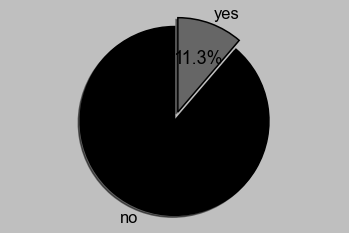

In [203]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'no', 'yes'
sizes = [29238, 3712]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



Percentage:
 no     88.7304
yes    11.2696
Name: y, dtype: float64


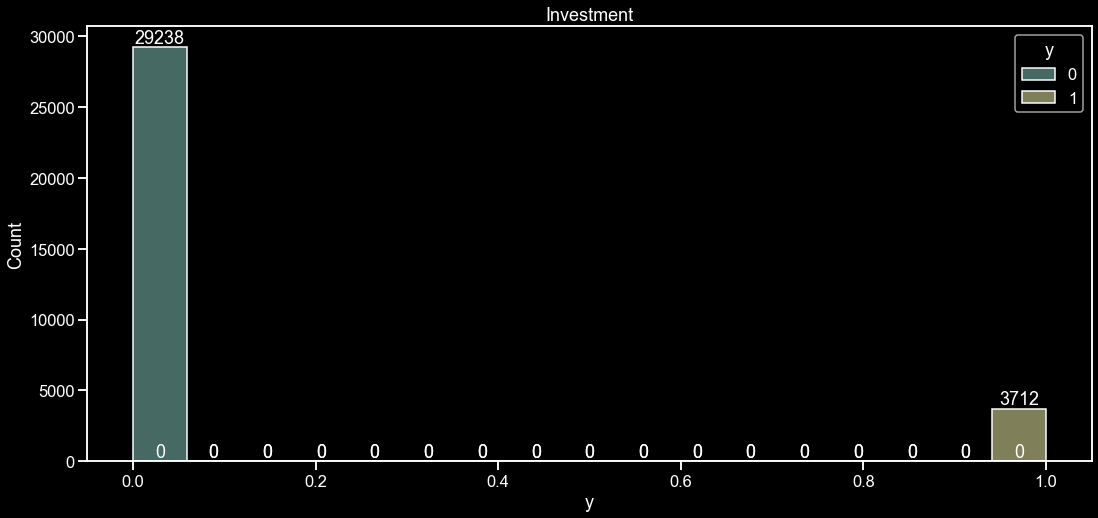

In [94]:
# used this
plt.figure(figsize=(18,8))
ax = sns.histplot(data=df,x='y',hue='y')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
print("Percentage:\n",train["y"].value_counts()/len(train)*100)
plt.title("Investment")
plt.show()

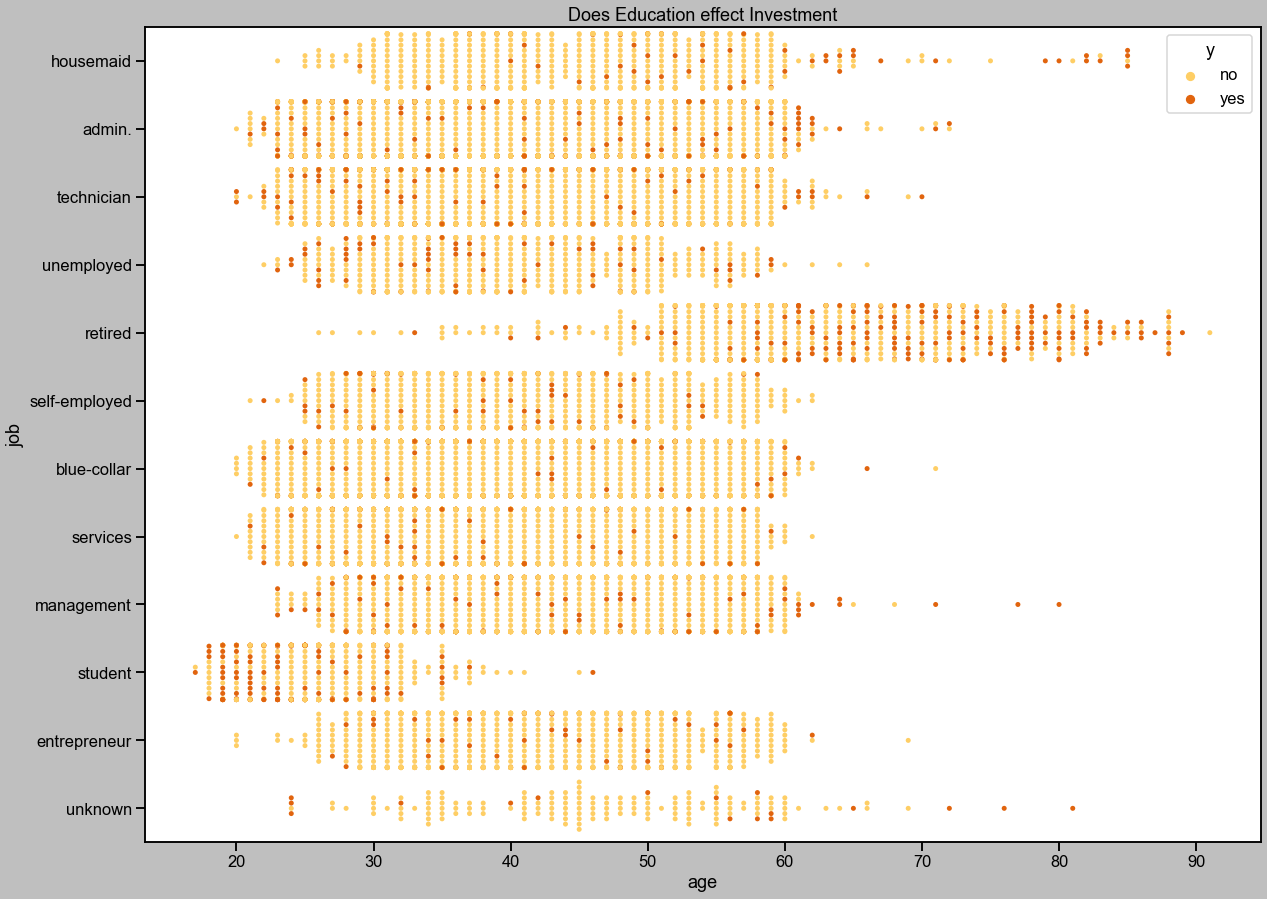

In [109]:
plt.figure(figsize=(20,15))
plt.style.use("grayscale")
sns.swarmplot(data=train,x='age',y='job',hue='y',palette='YlOrBr')
plt.title("Does Education effect Investment")
plt.show()

Percentage:
 married     60.682853
single      28.229641
divorced    10.900354
unknown      0.187152
Name: marital, dtype: float64


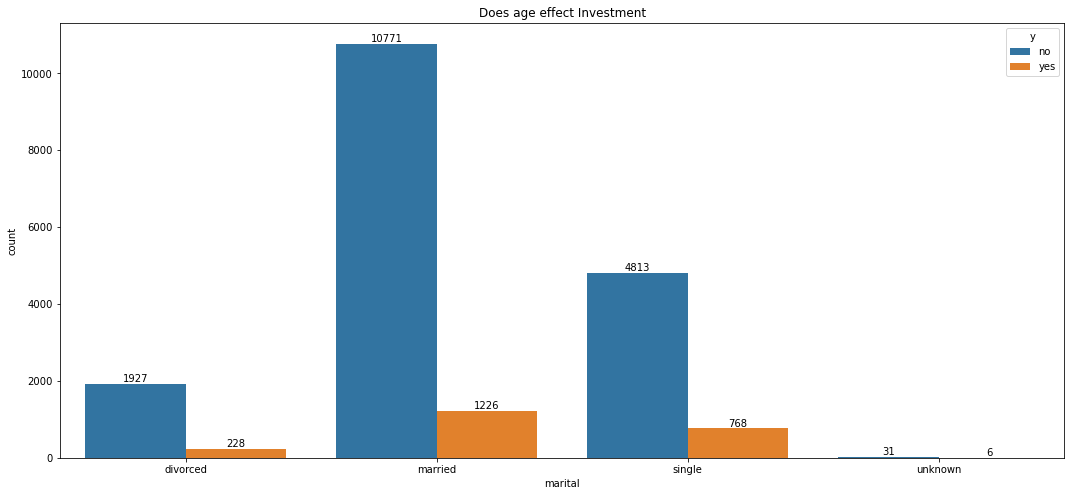

In [13]:
plt.figure(figsize=(18,8))
ax=sns.countplot(data=train,x='marital',hue='y')
print("Percentage:\n",train["marital"].value_counts()/len(train)*100)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Does age effect Investment")
plt.show()

Percentage:
 university.degree      30.030349
high.school            23.141123
basic.9y               14.597876
professional.course    12.488619
basic.4y                9.898837
basic.6y                5.589277
unknown                 4.198280
illiterate              0.055640
Name: education, dtype: float64


<Figure size 1440x720 with 0 Axes>

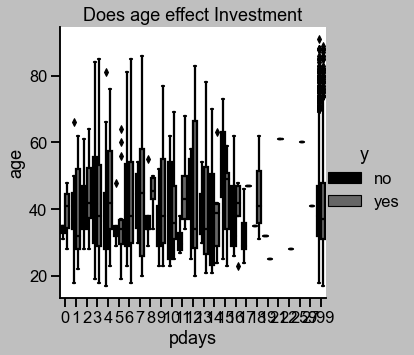

In [150]:
plt.figure(figsize=(20,10))
sns.catplot(data=train,x='pdays',y='age',hue='y',kind="box")
print("Percentage:\n",train["education"].value_counts()/len(train)*100)
plt.title("Does age effect Investment")
plt.show()

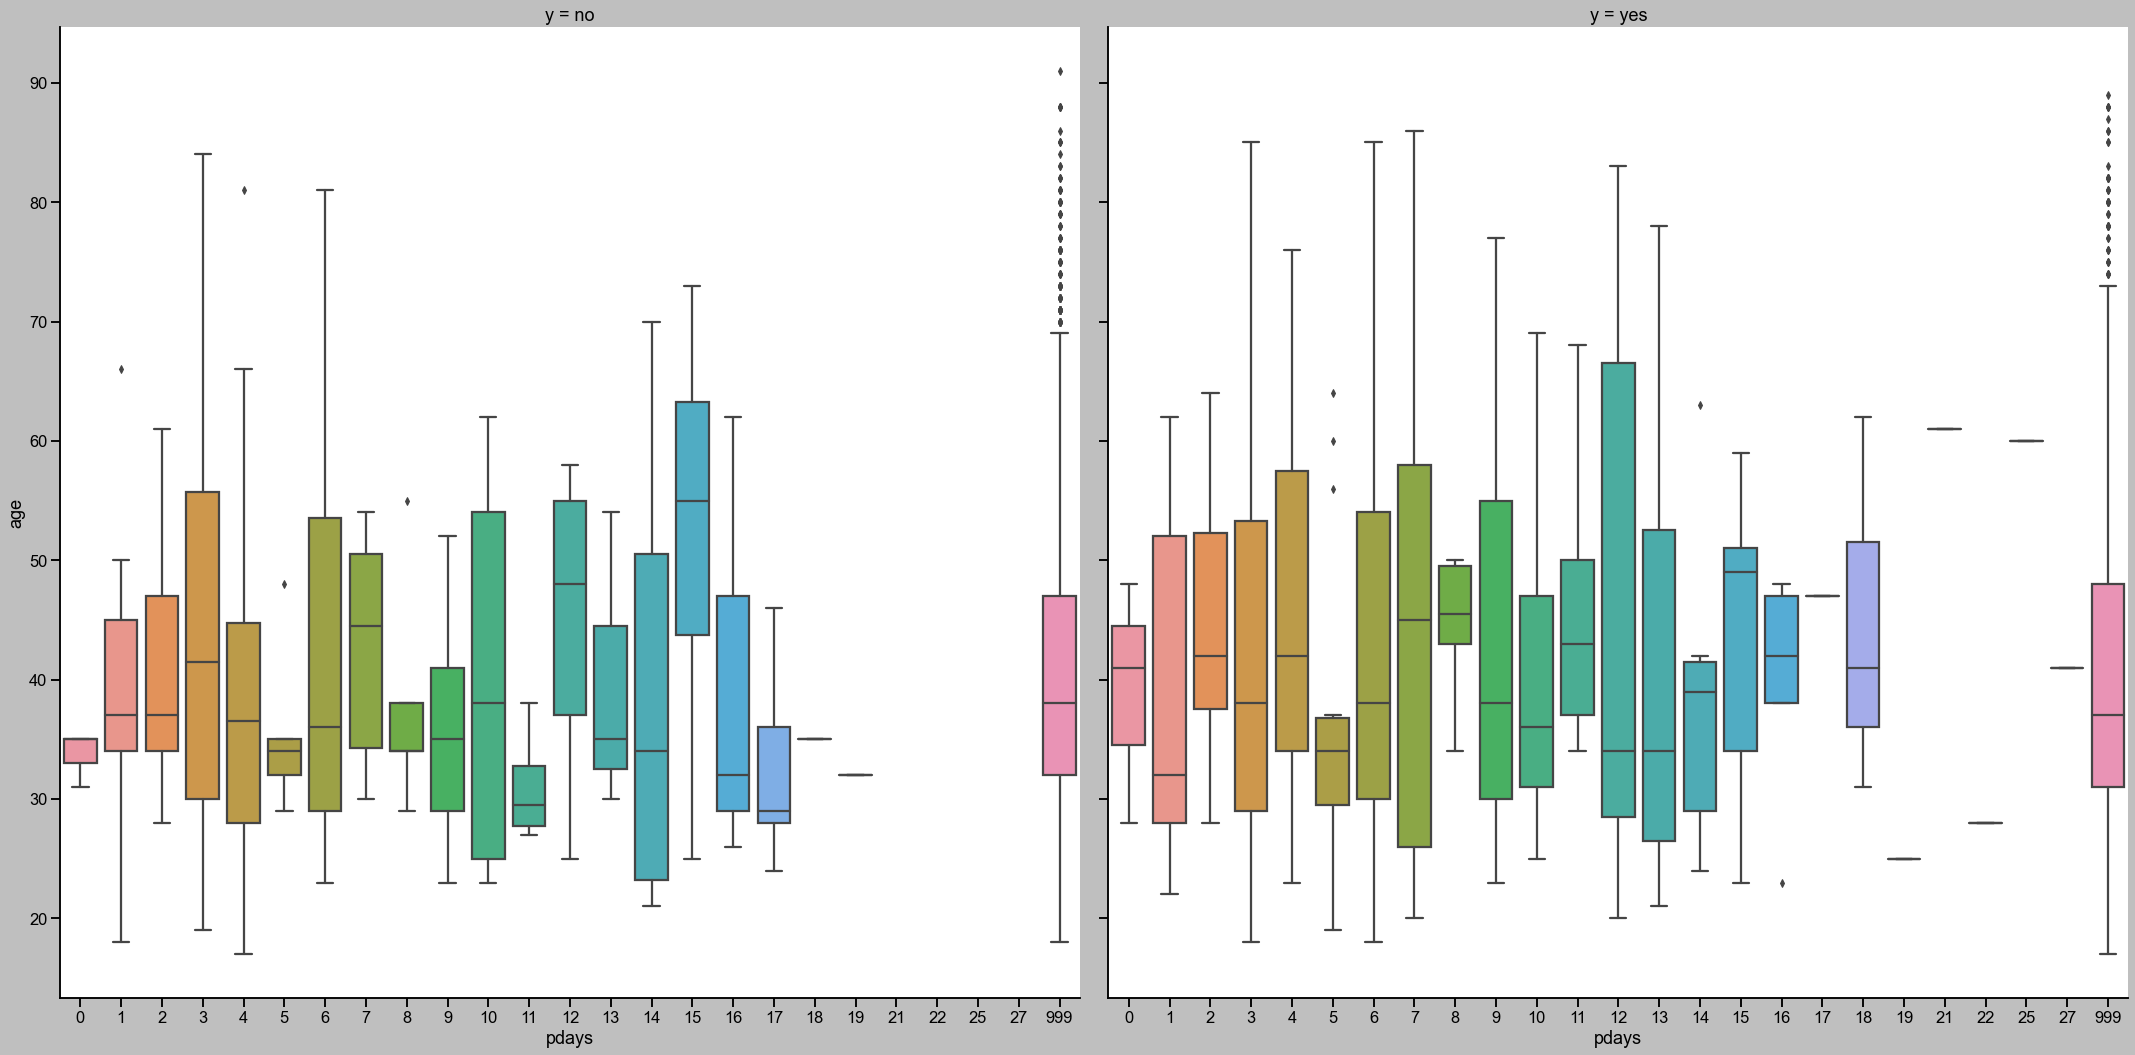

In [172]:
sns.catplot(data=train,x='pdays',y='age',col='y',kind="box",height=15,margin_titles=True)
plt.show()

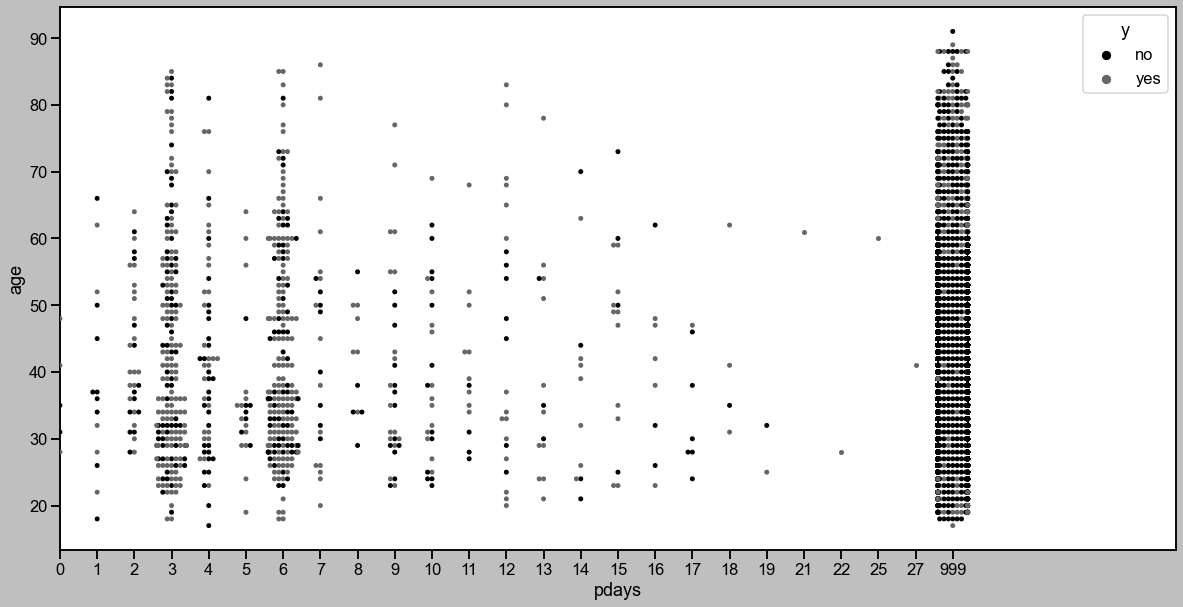

In [189]:
plt.figure(figsize=(20,10))
g=sns.swarmplot(data=train,x='pdays',y='age',hue='y')
g.set(xlim=(0, 30))
plt.show()

Percentage:
 admin.           25.199798
blue-collar      22.377339
technician       16.069803
services          9.817906
management        7.389985
retired           4.107233
entrepreneur      3.662114
self-employed     3.308042
housemaid         2.680830
unemployed        2.397572
student           2.205362
unknown           0.784016
Name: job, dtype: float64


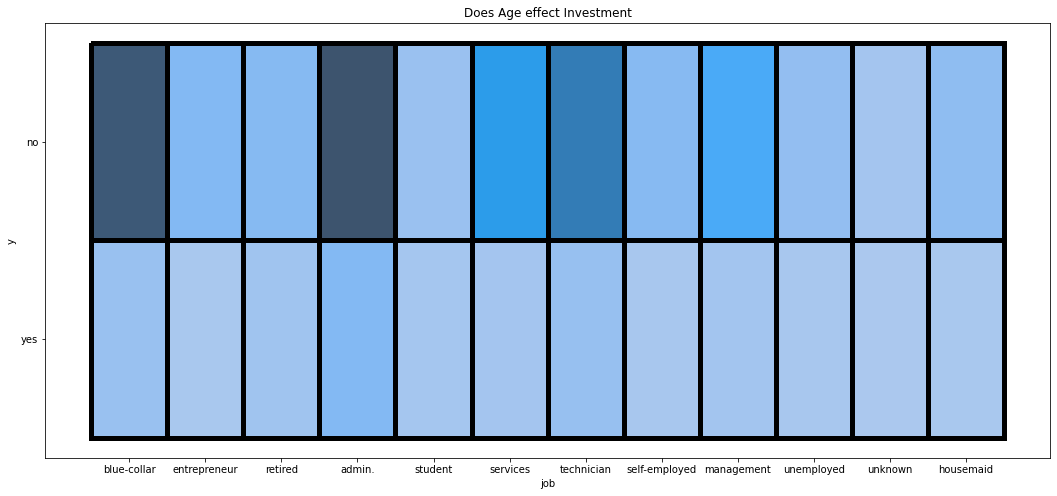

In [14]:
plt.figure(figsize=(18,8))
sns.histplot(
    data=df, x="job", y="y",palette='flare',
    linewidth=5, edgecolor="black",common_norm=False,common_bins=False,stat='count',
    multiple="stack",element="poly"
)
print("Percentage:\n",train["job"].value_counts()/len(train)*100)
plt.title("Does Age effect Investment")
plt.show()

Percentage:
 admin.           25.199798
blue-collar      22.377339
technician       16.069803
services          9.817906
management        7.389985
retired           4.107233
entrepreneur      3.662114
self-employed     3.308042
housemaid         2.680830
unemployed        2.397572
student           2.205362
unknown           0.784016
Name: job, dtype: float64


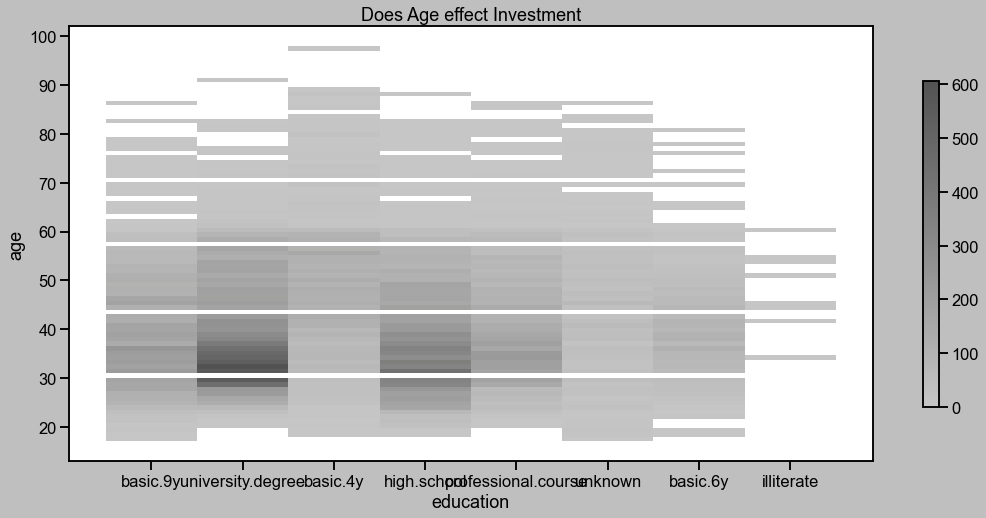

In [110]:
plt.figure(figsize=(18,8))
ax=sns.histplot(
    data=df, x="education", y="age",discrete=(True, False),
    cbar=True, cbar_kws=dict(shrink=.75)
)
cmap = plt.colormaps[plt.rcParams['image.cmap']].with_extremes(bad='y')
print("Percentage:\n",train["job"].value_counts()/len(train)*100)
plt.title("Does Age effect Investment")
plt.show()

In [16]:
brush = alt.selection(type='interval')
alt.data_transformers.disable_max_rows()
points = alt.Chart(train).mark_point().encode(
x='age',
y='job',
color=alt.condition(brush, 'y', alt.value('lightgray'))).add_selection(brush)
bars = alt.Chart(train).mark_bar().encode(
y='job',
color='y',
x='y').transform_filter(brush)
points & bars

alt.VConcatChart(...)

In [21]:
#dropping gender,churn,customer_id cause wont effect the churn rate while optaing the train,val,test
X_train = train.drop(columns=['y','age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
y_train = train.y

X_validate = validate.drop(columns=['y','age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
y_validate = validate.y

X_test = test.drop(columns=['y','age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
y_test = test.y

In [22]:
def score_models(X_train, y_train, X_validate, y_validate):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = dt_model1, rf_model, knn1_model.
    '''
    dt_model1 = DecisionTreeClassifier(max_depth = 5, random_state = 123)
    rf_model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
    knn1_model = KNeighborsClassifier()
    models = [dt_model1, rf_model, knn1_model]
    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_validate = y_validate
        predicted_validate = model.predict(X_validate)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('validate score: ')
        print(classification_report(actual_validate, predicted_validate))
        print('________________________')
        print('')
    return dt_model1, rf_model, knn1_model

In [23]:
#pulling from my model.py for the following functions to work.
#creating 3 different models to conclude whichone is the best one 
dt_model1, rf_model, knn1_model = score_models(X_train, y_train, X_validate, y_validate)

DecisionTreeClassifier(max_depth=5, random_state=123)

train score: 
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     17542
         yes       0.66      0.38      0.48      2228

    accuracy                           0.91     19770
   macro avg       0.79      0.68      0.72     19770
weighted avg       0.90      0.91      0.90     19770

validate score: 
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      5848
         yes       0.61      0.36      0.45       742

    accuracy                           0.90      6590
   macro avg       0.77      0.67      0.70      6590
weighted avg       0.89      0.90      0.89      6590

________________________

RandomForestClassifier(max_depth=10)

train score: 
              precision    recall  f1-score   support

          no       0.93      0.98      0.96     17542
         yes       0.77      0.42      0.55      2228

    accuracy      

In [ ]:
results = pd.DataFrame({'test':{'Test_rmse': rmse_test,'Test_r2': explained_variance_score(y_test.TaxesTotal,y_test.pred_lm2)}})
    results.dropna()